Part 1. Fully connected neural network using python and numpy(CIFAR10 dataset).

In [ ]:
#Download CIFAR10 dataset from pytorch and normalize (R,G,B) mean, sd as (0.5,0.5,0.5)
import torch, torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# import scipy.misc

In [ ]:
""" Pre-processing the dataset """
# get X input from trainset
X_train = trainset.data
print(X_train.shape)
# flatten (50000,32,32,3) size of X into (3072,50000) size of matrix
# normalize each pixel value to between 0 and 1
X_train = X_train.reshape(X_train.shape[0],-1).T / 255.0
print(X_train.shape)
# did the same thing on testset: got X input and flatten it
X_test = testset.data
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0],-1).T / 255.0
print(X_test.shape)
# get label y from trainset
y_train = trainset.targets
print(y_train)
# reshape y from list to numpy array
y_train = np.reshape(np.asarray(y_train),(50000,))
print(y_train.shape)
# did the same thing on testset: got y label and reshape it
y_test = testset.targets
y_test = np.reshape(np.asarray(y_test),(10000,))
print(y_test.shape)

# function takes X input and y labels and ratio to split validation set
def split(X, y, val_ratio):
  val_number = int(val_ratio * X.shape[1]) 
  random_indice = np.random.permutation(X.shape[1])
  return X[:, random_indice[val_number:]],y[random_indice[val_number:]], X[:, random_indice[:val_number]], y[[random_indice[:val_number]]]
  # return X[:, random_indice],y[random_indice], X[:, random_indice], y[random_indice]

# split validation set from training set
X_train, y_train, X_val, y_val = split(X_train, y_train, val_ratio = 0.1)


(50000, 32, 32, 3)
(3072, 50000)
(10000, 32, 32, 3)
(3072, 10000)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Labels:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


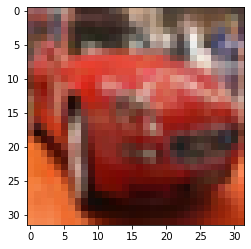

<Figure size 1152x1152 with 0 Axes>

Label:  1


In [ ]:
# Displaying one of the training image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.figure(figsize=(16, 16))
    plt.show()

labels_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']    
print("Labels: ",labels_list)
imshow(trainset[5][0])
print("Label: ",trainset[5][1])

In [ ]:
class NeuralNetwork():
    
    def __init__(self, layer_dims):
        """
        Arguments:
        layer_dims -- A list contains the dimensions of each layer in CNN.
    
        Attributes generated:
        parameters -- a dict contains parameters "W1", "b1", ..., "WL", "bL"of each corresponding layer
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        num_layers -- the length of layer_dims list
        """
        print("layer dims: ",layer_dims)
        np.random.seed(1)
        self.num_layers = len(layer_dims)
        self.layer_dims = layer_dims
        self.parameters = {}
        L = len(self.layer_dims)
        for l in range(1, L):
            self.parameters['W'+ str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
            # self.parameters['W'+ str(l)] = 0.10 * np.random.randn(layer_dims[l], layer_dims[l - 1]) 
            self.parameters['b'+ str(l)] = np.zeros([layer_dims[l], 1])

        self.X_val = None
        self.y_val = None
        self.epoch_list = []
        self.loss_list = []
        self.val_acc_list = []
        self.train_acc_list = []

    def affineForward(self, A, W, b):
        """
         Implement the linear portion of CNN's forward propagation.

          Arguments:
          A -- activation from previous layer 
          W -- weights matrix
          b -- bias vector

          Returns:
          Z -- the input of the activation function
          cache -- a dict stores "A", "W" and "b" during forward propagation
        """
        Z = np.dot(W, A) + b
        assert(Z.shape == (W.shape[0], A.shape[1]))
        cache = (A, W, b)

        return Z, cache

    def activationForward(self, Z, W, b, activation):
        """
         Implement the linear to activation portion of CNN's forward propagation

          Arguments:
          Z -- output from linear portion of forward propagation
          W,b -- weights, bias from parameters
          activation(type) -- "relu","softmax" in this case

          Returns:
          A -- the output of relu, softmax activation
          cache -- a dict stores "A", "W" and "b" during affine forward and "Z" from activation function
        """
        if activation == "relu":
            Z, linear_cache = self.affineForward(Z, W, b)
            A, activation_cache = self.relu(Z)
        elif activation == "softmax":
            Z, linear_cache = self.affineForward(Z, W, b)
            A, activation_cache = self.softmax(Z)
        cache = (linear_cache, activation_cache)
        assert A.shape == (W.shape[0], Z.shape[1])
        return A, cache
            

    def forwardPropagation(self, X):
        """
        Implement the forward propagation 

        Arguments:
        X -- input from input layer as the starting point of forward propagation
  
        Returns:
        A -- the output of the activation function for each layer
        caches -- a list stores parameters (cache) for each layer during forward propagation
        """
        A = X
        caches = []
        layers = len(self.parameters) // 2
        # First apply linear and activation function(relu) for hidden layers
        for layer in range(1,layers):
            A_prev = A
            A, cache = self.activationForward(A_prev, self.parameters["W"+str(layer)], self.parameters["b"+str(layer)], "relu")
            caches.append(cache)
        # First apply linear and activation function(softmax) for output layer
        AL, cache = self.activationForward(A, self.parameters["W"+str(layers)], self.parameters["b"+str(layers)], "softmax")
        caches.append(cache)

        assert(AL.shape == (10, X.shape[1]) )
        return AL, caches

    def softmax(self,AL):
        """
        Implement the softmax function 

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
  
        Returns:
        p -- softmax probability
        """
        # Apply softmax to output layer so the sum of all labels for a feature(axis=0) is 1.
        # Total sum would be the number of inputs(batch size)
        p = np.exp(AL - np.max(AL, axis=0, keepdims=True))
        p /= np.sum(p, axis=0, keepdims=True)

        return p, AL
      
    def costFunction(self, probs, y):
        """
        Implement the cross entrophy loss

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data
  
        Returns:
        cost -- the cross entropy loss value of each iteration of forward propagation
        """

        numInputs = y.shape[0]
                
        # Transform softmax probabilities so that we can calculate the log likelihood of a input image 
        probs = probs.T
        
        # Determine negative log of predicted label value and divide by the number of input images
        ll = np.negative(np.log(probs[range(numInputs), y]))
        cost = np.sum(ll) / numInputs
        
        return cost      
      
    def derivative_cost(self, AL, y): 
        """
        Implement the first step of back propagation: the derivative of cost function over AL

        Arguments:
        AL -- output of linear portion of the output layer (last layer)
        y -- the labels of data
  
        Returns:
        dAL -- the derivative of cost function over AL
        """

        numInputs = y.shape[0]       
        dAL = AL.T
        # Subtract the true labels by the sum of all other labels value.
        # It will update the parameters in counter direction to gradient in order to minimize loss. 
        dAL[range(numInputs), y] -= 1
        dAL /= numInputs
        
        return dAL.T

    def relu(self, Z):
        # If value is greater than zero return the value, else return 0. 
        A = np.maximum(0, Z)
        return A, Z

    def derivative_relu(self, dA, Z):
        """
        Implement the derivative calculation of relu activation during backpropagation

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
  
        Returns:
        dZ -- the derivative of cost function over Z
        """
        dZ = np.array(dA, copy=True) 
        # When z <= 0, then set dz to 0 as well.
        dZ[Z <= 0] = 0
        assert (dZ.shape == Z.shape)
        return dZ

    def affineBackward(self, dAL, cache):
        """
        Implement the linear portion of backward propagation of one layer (layer l)

        Arguments:
        dAL -- derivative of the cost with respect to the activation output (of current layer l)
        cache -- releases A, W, b, Z values stored from the tuple during forward propagation of layer l

        Returns:
        dA_prev -- Gradient of the cost over activation output from previous layer (layer l-1)
        dW -- Gradient of the cost over W for the current layer(layerl)
        db -- Gradient of the cost over b for the current layer(layer1)
        """
        A_prev, W, b = cache
        labels = A_prev.shape[1]
        m = A_prev.shape[1]

        dW = (1/labels) * np.dot(dAL, A_prev.T)
        db = (1/labels) * np.sum(dAL, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dAL)

        return dA_prev, dW, db
    
    def activationBackward(self, dA, cache, activation):
        """
        Implement the derivative of cost function over relu activation input Z

        Arguments:
        dA -- the gradient of cost function over relu activation ouput A
        cache -- a tuple stores A,W,b,Z for each layer, cache[3] is Z
        activation(type) -- 'relu'
  
        Returns:
        dA_prev, dW, db //edit
        relu_backward -- the derivative of cost function over Z
        """
        linear_cache, activation_cache = cache
        if activation == "relu":
            dZ = self.derivative_relu(dA, activation_cache) 
            dA_prev, dW, db = self.affineBackward(dZ, linear_cache)
        elif activation == "softmax":
            dA_prev, dW, db = self.affineBackward(dA, linear_cache)
        
        return dA_prev, dW, db     

    def backPropagation(self, dAL, caches):
        """
        Implement backpropagation for each layer

        Arguments:
        dAL -- the gradient of cost function over the activation output of last layer: starting point for backpropagation
        y -- the labels of data
        caches -- a list stores tuple of A,W,b,Z for each layer
  
        Returns:
        grads -- a dict stores dWl and dbl for each layer l
        """
        l = len(caches)
        grads = {}
        cc = caches[l-1]
        grads["dA" + str(l-1)], grads["dW" + str(l)], grads["db" + str(l)] = self.activationBackward(dAL, cc, "softmax")

        for i in reversed(range(l-1)):
            c = caches[i]
            grads["dA" + str(i)], grads["dW" + str(i+1)], grads["db" + str(i+1)] = self.activationBackward(grads["dA"+str(i+1)], c, "relu")

        return grads

    def updateParameters(self, grads, alpha):
        """
        Use gradient descent to implement parameters update
    
        Arguments:
        grads -- a dict stores all parameters gradients for each layer
        alpha -- learning rate
    
        Returns:
        self.parameters -- a dict stores updated parameters for W and b of each layer 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
        """
        L = len(self.parameters) // 2

        for l in range(1, L):
            self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - (alpha * grads["dW" + str(l)])
            self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - (alpha * grads["db" + str(l)])

        
    def normalized_X(self,X):
        """
        Standardize the input data by substract mean and divided by variance
        
        Arguments:
        X -- input data
        
        Return:
        norm_X -- standardized data
        """
      
        standardize = {}
        standardize['mean'] = np.mean(X, axis = 1, keepdims = True)
        standardize['var'] = np.var(X, axis = 1, keepdims = True)
        norm_X = (X - standardize['mean']) / np.sqrt(standardize['var'])
        return norm_X
            
    def train(self, X, y, iters, alpha, batch_size, print_every):
        """
        It takes advantage of every function in this class to implement training and validation using CNN.
        
        Arguments:
        X -- input data
        y -- labels of data
        iters -- number of iterations to run
        alpha -- learning rate
        batch_size -- number of samples to assign to minibatch
        print_every -- number of iterations to print
        
        Return:
        Number of iterations, train loss, train_acc, and valid_acc in every 100 iterations
        
        """
        X = self.normalized_X(X)
        for i in range(0, iters):
            X_batch, y_batch = self.get_batch(X, y, batch_size)
            AL, cache = self.forwardPropagation(X_batch)
            loss = self.costFunction(AL, y_batch)
            dAL = self.derivative_cost(AL, y_batch)
            grads = self.backPropagation(dAL, cache)
            self.updateParameters(grads, alpha)
            if i % print_every == 0:
                train_acc = self.score(self.predict(X), y)
                val_acc = self.score(self.predict(self.X_val), self.y_val)
                print('iter={:5}, loss={:.4f}, train_acc={:.4f}, validation_acc={:.4f}'.format(i, loss, train_acc, val_acc))
                self.train_acc_list.append(train_acc)
                self.val_acc_list.append(val_acc)
                self.loss_list.append(loss)
                self.epoch_list.append(i)
                
                
    def predict(self, X):
        """
        It predicts the label given . input x
        Argument:
        X -- input of data
        Return:
        y_pred -- predicted label
        """
        X = self.normalized_X(X)
        AL, _ = self.forwardPropagation(X)
        y_pred = np.argmax(AL, axis = 0)
        return y_pred
      
      
    def score(self, y_pred, y_true):
        """
        It calculates the percentage of correct predicted labels over true labels
        
        Argument:
        y_pred-- predicted labels
        y_true -- true labels
        
        REturn: percentage of correct predicted labels
        """
        correct = np.mean(y_pred == y_true)
        return correct
      
    def load_validation_set(self, X_val, y_val):
        """
        Load validation set to CNN
        """
        self.X_val = X_val
        self.y_val = y_val
  

    def get_batch(self, X, y, batch_size):
        """
        Load minibatch to CNN
        """
        batch_index = np.random.randint(X.shape[1], size = batch_size)
        X_batch = X[:, batch_index]
        y_batch = y[batch_index]
        return X_batch, y_batch
   

In [ ]:
"""
Train CNN and validate at the same time
"""
# I tried iddifferent architecture of CNN and it turns out 3 hidden layers of 1024, 256, 128 neurons gives me best reslt
# I also tried different learning rate and batch size and it turns out alpha=1 and batch_size=100 gives me best result
# In this trained CNN, I reach 54.00% validation accuracy and 52.37% test accuracy in the end.
from datetime import datetime
now = datetime.now()

layer_dims = [X_train.shape[0], 1024, 256, 128, 10]
CNN = NeuralNetwork(layer_dims)
CNN.load_validation_set(X_val, y_val)
CNN.train(X_train, y_train, iters=10001, alpha=1, batch_size=100,print_every=100)

print("Time taken: ", (datetime.now() - now).total_seconds())

layer dims:  [3072, 1024, 256, 128, 10]
iter=    0, loss=2.3458, train_acc=0.0929, validation_acc=0.0880
iter=  100, loss=2.0481, train_acc=0.3196, validation_acc=0.3106
iter=  200, loss=1.8945, train_acc=0.3669, validation_acc=0.3544
iter=  300, loss=1.7294, train_acc=0.3918, validation_acc=0.3850
iter=  400, loss=1.6088, train_acc=0.4121, validation_acc=0.4014
iter=  500, loss=1.4332, train_acc=0.4218, validation_acc=0.4094
iter=  600, loss=1.6234, train_acc=0.4388, validation_acc=0.4244
iter=  700, loss=1.4200, train_acc=0.4486, validation_acc=0.4232
iter=  800, loss=1.6124, train_acc=0.4606, validation_acc=0.4432
iter=  900, loss=1.4354, train_acc=0.4700, validation_acc=0.4470
iter= 1000, loss=1.4203, train_acc=0.4759, validation_acc=0.4498
iter= 1100, loss=1.3921, train_acc=0.4836, validation_acc=0.4536
iter= 1200, loss=1.5020, train_acc=0.4897, validation_acc=0.4546
iter= 1300, loss=1.4239, train_acc=0.4947, validation_acc=0.4658
iter= 1400, loss=1.3770, train_acc=0.4994, validat

In [ ]:
#test set accuracy
y_pred = CNN.predict(X_test)
test_acc = CNN.score(y_pred, y_test)
print('test_acc ={:4}'.format(test_acc))

test_acc =0.5237


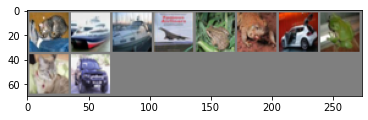

<Figure size 1152x1152 with 0 Axes>

testlabels:   cat  ship  ship plane  frog  frog   car  frog   cat   car
predlabels:   cat  ship plane  ship  deer  frog   cat  frog   dog   car


In [ ]:
#visualize the prediction result of trained CNN on some of test set images
import torchvision
import torchvision.transforms as transforms
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.figure(figsize=(16, 16))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("testlabels: " + ' '.join('%5s' % classes[labels[j]] for j in range(10)))
print("predlabels: " + ' '.join('%5s' % classes[y_pred[j]] for j in range(10)))

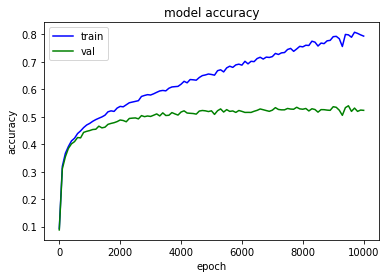

In [ ]:
# Plot for model accuracy
plt.plot(CNN.epoch_list, CNN.train_acc_list , 'b', label='training accuracy')
plt.plot(CNN.epoch_list, CNN.val_acc_list , 'g', label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

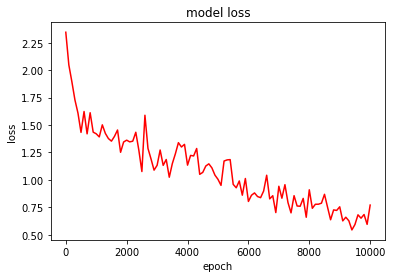

In [ ]:
# Plot for model loss
plt.plot(CNN.epoch_list, CNN.loss_list , 'r', label='training accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()